## Funciones y parámetros generales de Ondas Electromagnéticas

In [46]:
import math
import cmath

# Definición de constantes
mu_0 = 4 * math.pi * 10**-7
eps_0 = 8.85 * 10**-12
eta_0 = math.sqrt(mu_0 / eps_0)


def alpha(omega, mu, epsilon, sigma):
    """ Calcula el parámetro de la constante de atenuación para una onda en un medio cualquiera.
        @param omega      Frecuencia angular de la onda
        @param mu         Permeabilidad del medio
        @param epsilon    Permitividad del medio
        @param sigma      Conductividad del medio
        @return alpha     Constante de atenuación del medio
    """
    return omega * math.sqrt(mu * epsilon / 2) * math.sqrt( math.sqrt(1 + (sigma / omega / epsilon)**2) - 1)


def beta(omega, mu, epsilon, sigma):
    """ Calcula el parámetro de la constante de fase para una onda en un medio cualquiera.
        @param omega      Frecuencia angular de la onda
        @param mu         Permeabilidad del medio
        @param epsilon    Permitividad del medio
        @param sigma      Conductividad del medio
        @return beta     Constante de fase del medio
    """
    return omega * math.sqrt(mu * epsilon / 2) * math.sqrt( math.sqrt(1 + (sigma / omega / epsilon)**2) + 1)

def impedance(omega, mu, epsilon, sigma):
    """ Calcula la impedancia intrínseca del medio.
        @param omega      Frecuencia angular de la onda
        @param mu         Permeabilidad del medio
        @param epsilon    Permitividad del medio
        @param sigma      Conductividad del medio
        @return eta       Impedancia intrínseca del medio
    """
    return cmath.sqrt( (omega * mu * 1j) / (sigma + omega * epsilon * 1j) )


def alpha_conductor(omega, mu, sigma):
    """ Calcula el parámetro de la constante de atenuación para una onda en un medio cualquiera.
        @param omega      Frecuencia angular de la onda
        @param mu         Permeabilidad del medio
        @param sigma      Conductividad del medio
        @return alpha     Constante de atenuación del medio
    """
    return math.sqrt(omega * mu * sigma / 2)


def beta_conductor(omega, mu, sigma):
    """ Calcula el parámetro de la constante de atenuación para una onda en un medio cualquiera.
        @param omega      Frecuencia angular de la onda
        @param mu         Permeabilidad del medio
        @param sigma      Conductividad del medio
        @return alpha     Constante de atenuación del medio
    """
    return math.sqrt(omega * mu * sigma / 2)

def impedance_conductor(omega, mu, sigma):
    """ Calcula la impedancia intrínseca del medio.
        @param omega      Frecuencia angular de la onda
        @param mu         Permeabilidad del medio
        @param sigma      Conductividad del medio
        @return eta       Impedancia intrínseca del medio
    """
    return cmath.sqrt( omega * mu / sigma) * cmath.exp(math.pi / 4 * 1j)

def reflection_coef(eta_1, eta_2):
    """ Calcula el coeficiente de reflexión del medio 1 al medio 2.
        @param eta_1     Impedancia intrinseca del primer medio
        @param eta_2     Impedancia intrinseca del segundo medio
    """
    return (eta_2 - eta_1) / (eta_2 + eta_1)

def transmission_coef(eta_1, eta_2):
    """ Calcula el coeficiente de transmisión del medio 1 al medio 2.
        @param eta_1     Impedancia intrinseca del primer medio
        @param eta_2     Impedancia intrinseca del segundo medio
    """
    return (eta_2 * 2) / (eta_2 + eta_1)

def reflectivity_coef(r):
    """ Devuelve el coeficiente de reflectividad a partir del coeficiente de reflexión.
        @param r      Coeficiente de reflexión
    """
    return abs(r)**2

def transmissivity_coef(t):
    """ Devuelve el coeficiente de transmisividad a partir del coeficiente de reflexión.
        @param t      Coeficiente de transmisión
    """
    return abs(t)**2

In [47]:
# Ejercicio 11 (pruebas del código de parámetros)
sigma = 10**-2
eps = eps_0 * 10
mu = mu_0
f = 20 * 10**6
omega = 2 * math.pi * f

a = alpha(omega, mu, eps, sigma)
b = beta(omega, mu, eps, sigma)
e = impedance(omega, mu, eps, sigma)

print(f'Alfa={a} Beta={b} Impedance={abs(e)} {cmath.phase(e)}')

Alfa=0.5502550934516584 Beta=1.4349133001828631 Impedance=102.75480431072266 0.3661810689611626


In [72]:
# Ejercicio 24
sigma = 4 * 10**7
d = 1 * 10**-3
f = 100
omega = 2 * math.pi * f

eta_1 = eta_0
eta_2 = impedance_conductor(omega, mu_0, sigma)
eta_3 = eta_0

a = alpha_conductor(omega, mu_0, sigma)
b = beta_conductor(omega, mu_0, sigma)
tita = b*d

t12 = transmission_coef(eta_1, eta_2)
t23 = transmission_coef(eta_2, eta_3)
r21 = reflection_coef(eta_2, eta_1)
r23 = reflection_coef(eta_2, eta_3)

print(f't12 = {t12}')
print(f't23 = {t23}')
print(f'r21 = {r21}')
print(f'r23 = {r23}')
print(f'El tita = {tita}')
print(f'Alfa={a}')
tau = t12 * t23 * cmath.exp(-a * d) * cmath.exp(-tita*1j) * (1 + r21 * r23 * cmath.exp(-a * d * 2) * cmath.exp(-tita*2*1j))
print(f'El tau={tau}')
print(f'El EA={20*math.log10(1/abs(tau))}dB')

t12 = (1.6674260098807883e-08+1.6674259820776935e-08j)
t23 = (1.9999999833257402-1.6674259820776935e-08j)
r21 = (0.9999999833257401-1.6674259820776935e-08j)
r23 = (0.9999999833257401-1.6674259820776935e-08j)
El tita = 0.12566370614359174
Alfa=125.66370614359172
El tau=(6.255345711462555e-08+3.833992182242579e-08j)
El EA=142.68984930439507dB


In [64]:
# Ejercicio 25
f = 915 * 10**6
omega = 2 * math.pi * f
d = 4 * 10**-2

sigma_musculo = 1.6
epsilon_musculo = 51 * eps_0
mu_musculo = mu_0

sigma_grasa = 0.1
epsilon_grasa = 5.6 * eps_0
mu_grasa = mu_0

# Calculando para el item (a)
eta_1 = eta_0
eta_3 = impedance(omega, mu_musculo, epsilon_musculo, sigma_musculo)
r_a = reflection_coef(eta_1, eta_3)
R_a = reflectivity_coef(r_a)

print(f'Se está transmitiendo {round((1-R_a)*100, 2)}%')

# Calculando para el item (b)
eta_2 = impedance(omega, mu_grasa, epsilon_grasa, sigma_grasa)
alpha_grasa = alpha(omega, mu_grasa, epsilon_grasa, sigma_grasa)
beta_grasa = beta(omega, mu_grasa, epsilon_grasa, sigma_grasa)
prof_grasa = 1 / alpha_grasa

print(f'La grasa tiene una profundidad de penetración de {round(prof_grasa, 4) * 100} cm')

t12 = transmission_coef(eta_1, eta_2)
t23 = transmission_coef(eta_2, eta_3)
r21 = reflection_coef(eta_2, eta_1)
r23 = reflection_coef(eta_2, eta_3)
tita = beta_grasa*d

print(f't12 = {t12}')
print(f't23 = {t23}')
print(f'r21 = {r21}')
print(f'r23 = {r23}')

tau = t12 * t23 * cmath.exp(-alpha_grasa * d) * cmath.exp(-tita*1j) * (1 + r21 * r23 * cmath.exp(-alpha_grasa * d * 2) * cmath.exp(-tita*2*1j))
T = transmissivity_coef(tau)

print(f'Alfa={alpha_grasa}')
print(f'El tita={tita}')
print(f'El tau total={tau}')
print(f'Se está transmitiendo {round(T, 4)*100}%')

Se está transmitiendo 39.29%
La grasa tiene una profundidad de penetración de 12.75 cm
t12 = (0.5795798060473069+0.06972209948091476j)
t23 = (0.47767504679570844+0.03915448269775823j)
r21 = (0.4204201939526932-0.06972209948091476j)
r23 = (-0.5223249532042915+0.039154482697758224j)
Alfa=7.845337440966583
El tita=1.8417437047060432
El tau total=(-0.032493358236296566-0.22000010992742758j)
Se está transmitiendo 4.95%


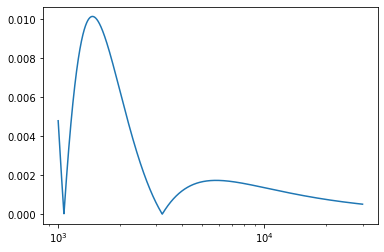

In [82]:
# Ejercicio 26
import numpy as np
from matplotlib import pyplot

h1 = 100
h2 = 3
londa = 0.375
delta = lambda R: (4*math.pi*h1*h2) / (R*londa)
R = np.arange(1000, 30000, 1)
E = np.sqrt(120) * np.sqrt(1 + np.cos(delta(R))) / R

pyplot.semilogx(R, E)
pyplot.show()